(a)

In [182]:
# Import packages
import os
import matplotlib as mpl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [205]:
# read csv file
faces_path1 = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
faces_train = pd.read_csv(faces_path1)
faces_path2 = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
faces_test = pd.read_csv(faces_path2)
face_train = pd.read_csv(faces_path1)

In [207]:
faces_train_0 = faces_train[faces_train.smiling == 0]
faces_train_1 = faces_train[faces_train.smiling == 1]
faces_test_0 = faces_test[faces_test.smiling == 0]
faces_test_1 = faces_test[faces_test.smiling == 1]
faces_test.shape

(1200, 137)

In [208]:
print(faces_train_0.loc[:, 'x50'].describe())
print(faces_train_1.loc[:, 'x50'].describe())
print(faces_test_0.describe())
print(faces_test_1.describe())

count    2465.000000
mean       -0.181056
std         0.033320
min        -0.311000
25%        -0.202000
50%        -0.184000
75%        -0.164000
max         0.110000
Name: x50, dtype: float64
count    2335.000000
mean       -0.221012
std         0.031722
min        -0.332000
25%        -0.242000
50%        -0.222000
75%        -0.200000
max        -0.089000
Name: x50, dtype: float64
               x0          y0          x1          y1          x2          y2  \
count  608.000000  608.000000  608.000000  608.000000  608.000000  608.000000   
mean    -1.924752    1.463143   -1.910474    1.017789   -1.844225    0.566248   
std      0.672379    0.463935    0.634122    0.436303    0.617002    0.410027   
min     -3.846000   -2.116000   -3.673000   -2.341000   -3.487000   -2.539000   
25%     -2.311000    1.206750   -2.265750    0.785500   -2.198500    0.342000   
50%     -1.952500    1.473000   -1.932000    1.031000   -1.861500    0.594500   
75%     -1.587250    1.733250   -1.558000    

(b)

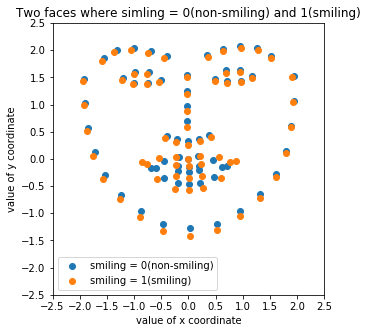

In [241]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(5,5)) 
x1 = faces_train_0.mean()[0::2]
x1 = x1.drop('smiling')
y1 = faces_train_0.mean()[1::2]
plt.scatter(x1,y1,label = 'smiling = 0(non-smiling)')
x2 = faces_train_1.mean()[0::2]
x2 = x2.drop('smiling')
y2 = faces_train_1.mean()[1::2]
ax = plt.scatter(x2,y2,label = 'smiling = 1(smiling)')
plt.title('Two faces where simling = 0(non-smiling) and 1(smiling)')
plt.xlabel('value of x coordinate')
plt.ylabel('value of y coordinate')
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))
plt.axes().set_aspect('equal')
x_major_locator=MultipleLocator(0.5)

y_major_locator=MultipleLocator(0.5)

ax=plt.gca()

ax.xaxis.set_major_locator(x_major_locator)

ax.yaxis.set_major_locator(y_major_locator)
plt.legend()
plt.show()

In [212]:
face_train1 = face_train[face_train['smiling'] == 1]
face_train1 = face_train1.drop('smiling',1)
face_mean1 = face_train1.mean(axis=0, skipna=False)
face_train2 = face_train[face_train['smiling'] == 0]
face_train2 = face_train2.drop('smiling',1)
print(face_train2)
face_mean2 = face_train2.mean(axis=0, skipna=False)

         x0     y0     x1     y1     x2     y2     x3     y3     x4     y4  \
0    -1.861  1.350 -1.835  0.892 -1.756  0.458 -1.704 -0.000 -1.625 -0.458   
3    -1.660  1.812 -1.701  1.324 -1.660  0.801 -1.620  0.314 -1.498 -0.139   
4    -1.776  1.551 -1.693  1.140 -1.549  0.729 -1.363  0.318 -1.115 -0.075   
7     0.237  1.515 -0.068  1.267 -0.271  0.909 -0.338  0.523 -0.406  0.138   
9    -2.008  1.898 -1.971  1.432 -1.858  0.965 -1.708  0.515 -1.502  0.080   
11   -2.374  1.335 -2.226  0.861 -2.028  0.387 -1.830 -0.086 -1.583 -0.517   
15   -3.501  0.918 -3.405  0.393 -3.261 -0.175 -3.021 -0.700 -2.589 -1.093   
23   -1.931  1.802 -1.931  1.345 -1.864  0.901 -1.763  0.443 -1.595  0.014   
25   -2.293  0.763 -2.012  0.339 -1.638  0.042 -1.217 -0.212 -0.795 -0.424   
28   -1.100  1.719 -1.125  1.329 -1.100  0.894 -1.025  0.458 -0.925  0.046   
30   -2.320  2.010 -2.431  1.513 -2.476  0.974 -2.454  0.435 -2.298 -0.041   
32   -1.861  1.082 -1.765  0.674 -1.622  0.265 -1.503 -0.163 -1.

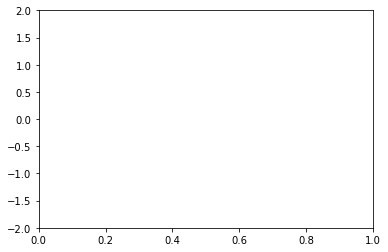

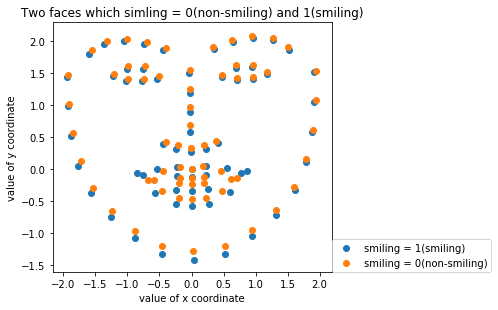

In [230]:
plt.ylim((-2.0,2.0))
dfx1=face_mean1[[i%2==0 for i in range(len(face_mean1.index))]]
dfy1=face_mean1[[i%2==1 for i in range(len(face_mean1.index))]]
dfx2=face_mean2[[i%2==0 for i in range(len(face_mean2.index))]]
dfy2=face_mean2[[i%2==1 for i in range(len(face_mean2.index))]]
plt.figure(figsize=(5,5)) 
plt.scatter(dfx1,dfy1,label ='smiling = 1(smiling)') 
plt.scatter(dfx2,dfy2,label ='smiling = 0(non-smiling)')
plt.xlabel('value of x coordinate')
plt.ylabel('value of y coordinate')
plt.title("Two faces which simling = 0(non-smiling) and 1(smiling)")
plt.axes().set_aspect('equal')
plt.legend()
plt.legend(loc=[1, 0])

In [187]:
difference: the corner of the mouth of graph(smiling = 1) is upward whereas 
            the mouth corner of graph(smiling = 0) is nonsmiling.
            the chin of the mouth of graph(smiling = 1) is more downward 
            than graph(smiling = 0).

SyntaxError: invalid syntax (<ipython-input-187-b0b445ff0e9f>, line 1)

(c)

In [188]:
gini Impurity.
Since computing square is cheaper than 
logarithmic function we prefer Gini impurity over entropy.

SyntaxError: invalid syntax (<ipython-input-188-f2ead6b1eb5b>, line 1)

(d)

In [189]:
large depth might let the test data hard to fit.
It will cause overfitting.(too much focus on the training set (programmers) and 
                           learns complex relations which may not be valid in 
                           general for new data (test set).)

small depth might cause underfitting(a model is too simple).


SyntaxError: invalid syntax (<ipython-input-189-39d0d06869e0>, line 1)

(e)

In [2]:
clf=tree.DecisionTreeClassifier(max_depth=2,random_state=2001)
f1 = faces_train.drop(['smiling'], axis=1)
f2 = faces_train['smiling']
clf=clf.fit(f1,f2)
f3 = faces_test.drop(['smiling'], axis=1)
f4 = faces_test['smiling']

score_train = clf.score(f1,f2)
score_test = clf.score(f3,f4)
print(score_train)
print(score_test)
clf=tree.DecisionTreeClassifier(max_depth=8,random_state=2001)
clf=clf.fit(f1,f2)
f3 = faces_test.drop(['smiling'], axis=1)
f4 = faces_test['smiling']
score_train = clf.score(f1,f2)
score_test = clf.score(f3,f4)
print(score_train)
print(score_test)
clf=tree.DecisionTreeClassifier(max_depth=20,random_state=2001)
clf=clf.fit(f1,f2)
f3 = faces_test.drop(['smiling'], axis=1)
f4 = faces_test['smiling']
score_train = clf.score(f1,f2)
score_test = clf.score(f3,f4)
print(score_train)
print(score_test)

NameError: name 'tree' is not defined

In [3]:
Comment: model whose depth is 8 is best. 
         model(depth = 2) is underfitting, the accuracy of training data is 0.79 and 
         test data is 0.78. Those values are neither high enough, which means this model is too simple.
         model(depth = 20) is overfitting, the accuracy of training data is 1.00 and
         test data is 0.82. The model focus too much on the training set and 
         learns complex relations which may not be valid in general for test set
         (The accuracy fall from 1 to 0.82, this is a significant dencent).
         model(depth = 8) is fitting well, the accuracy of training data is 0.93 and
         test data is 0.84. Those two values do not have too much difference. The model
         neither underfitting nor overfitting.

SyntaxError: invalid syntax (<ipython-input-3-6b7ae92c991e>, line 1)

(f)

In [4]:
f1 = faces_train.drop(['smiling'], axis=1)
f2 = faces_train['smiling']
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=2001)
clf=clf.fit(f1,f2)
a = clf.feature_importances_
print(a.shape())
print(np.argmax(a))
# x50
a = np.delete(a,[100])
print(np.argmax(a))
# y48
a = np.delete(a,[97])
print(np.argmax(a))
# y29

NameError: name 'faces_train' is not defined

(g)

In [ ]:
chaos or the face might rotate.